# Data analysis for an online store selling computer games

**Project Description**

The popularity of computer games has only grown over the past decades. The variety of games offered on the market for such products is also growing. It is not surprising that computer game sales platforms want to bet on potentially promising products and be sure that the funds invested in promoting a particular game will pay off with large sales and reviews from satisfied customers.


**Objective of the Study**

Identify the patterns that determine the success of a game, which will allow you to bet on a potentially popular product and plan advertising campaigns.

**Description of Data**

Historical data on game sales, user and expert ratings, genres and platforms (e.g. Xbox or PlayStation) are available from open sources.

We have data up to 2016 and are planning an advertising campaign for 2017. Data for 2016 may be incomplete.

Data Information:

- `Name` — game name
- `Platform` — platform
- `Year_of_Release` — year of release
- `Genre` — game genre
- `NA_sales` — North American sales (millions of copies sold)
- `EU_sales` — European sales (millions of copies sold)
- `JP_sales` — Japanese sales (millions of copies sold)
- `Other_sales` — sales in other countries (millions of copies sold)
- `Critic_Score` — critic score (maximum 100)
- `User_Score` — user score (maximum 10)
- `Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
  

**Study process**

1. Importing libraries
2. Data overview:
- Loading data;
- Getting to know the data: `head()`, `info()`, `describe()`;
- *Conclusion*: what are the main types, whether there are gaps.
3. Data preprocessing:
- Creating a copy of the dataset;
- Checking column names, converting to lowercase;
- Studying and converting **data types**;
- *Conclusion*: reasons for replacing the data type, recommendations for collecting data;
- Processing **missing values**;
- *Conclusion*: possible reasons for gaps, recommendations for eliminating them;
- Studying and processing **explicit** and **implicit duplicates**;
- *Conclusion*: possible reasons for duplicates, recommendations for eliminating them;
- Parsing the meaning of the abbreviation 'tbd' and describing how to process it;
- Calculating total sales in all regions and adding them to a separate column.
4. Exploratory data analysis:
- How many games were released in different years. Are data for all periods important?;
- How sales changed by platform. Selecting the platform with the highest total sales and plotting the distribution by year. In what typical time frame do new platforms appear and old ones disappear?;
- Determining the current period as a result of studying the previous questions;
- Which platforms are leading in sales, growing or falling? Selecting several potentially profitable platforms;
- Plotting a box plot for global game sales by platform. Description of the result;
- How do user and critic reviews affect sales within one popular platform. Plotting a scatter plot and calculating the correlation between reviews and sales. Formulating conclusions;
- Comparing the findings with game sales on other platforms;
- Studying the general distribution of games by genre. What can be said about the most profitable genres? Are there genres with high and low sales?
5. Creating a user profile for each region. Definition for each region user (NA, EU, JP):
- Most popular platforms (top 5). Description of differences in sales shares;
- Most popular genres (top 5). Explanation of differences;
- Does the ESRB rating affect sales in a particular region?
6. Testing hypotheses:
- Average user ratings for Xbox One and PC platforms are the same;
- Average user ratings for Action and Sports genres are different;
- Explain how the null and alternative hypotheses are formulated;
- What criterion is used to test the hypotheses and why.
- **General conclusion**: description of the research results, main findings, and recommendations.

## Import Libraries

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import missingno as msno

## Data Overview

In [ ]:
data_games = pd.read_csv('/datasets/games.csv')

### Getting to Know the Data

In [ ]:
#universal function for reviewing data
def data_review(data):
    '''
    data - DataFrame

    '''
    print('*'*10, 'The Original DataFrame', '*'*10)
    display(data.head())
    print('')
    print('')
    print('*'*10, 'General Information', '*'*10)
    print('')
    display(data.info())
    print('')
    print('')
    print('*'*10, 'Has NaN', '*'*10)
    display(data.isna().sum())
    print('*'*10, 'Has NaN Percentage (%)', '*'*10)
    display(((data.isna().sum() / data_games.shape[0]) * 100))
    print('')
    print('')
    print('*'*10, 'Descriptive Statistics', '*'*10)
    display(data.describe())

In [ ]:
data_review(data_games)

********** The Original DataFrame **********


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN




********** General Information **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



********** Has NaN **********


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


********** Has NaN Percentage (%) **********


,0
Name,0.011965
Platform,0.000000
Year_of_Release,1.609333
Genre,0.011965
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.319174
User_Score,40.089740




********** Descriptive Statistics **********


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Let's perform visual processing of missing values**

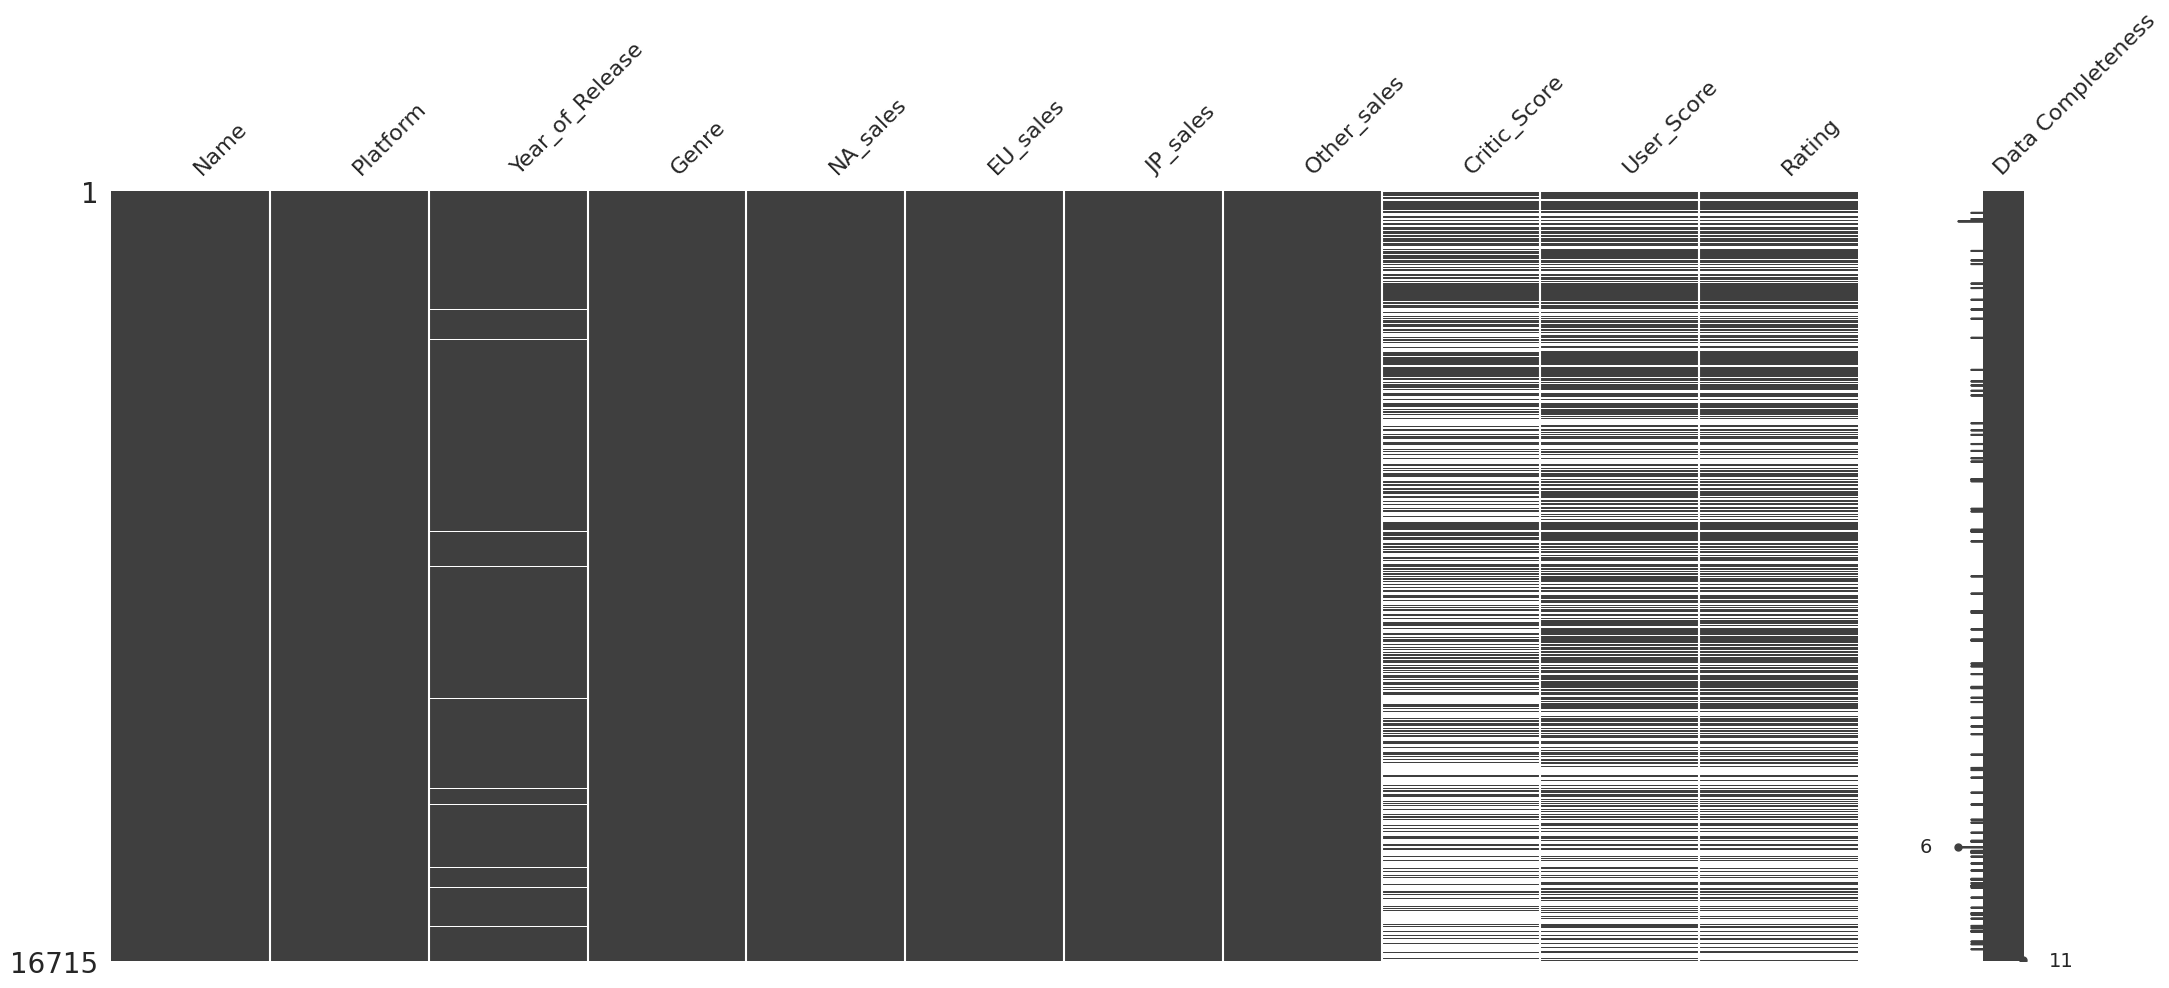

In [ ]:
msno.matrix(data_games, labels=True);

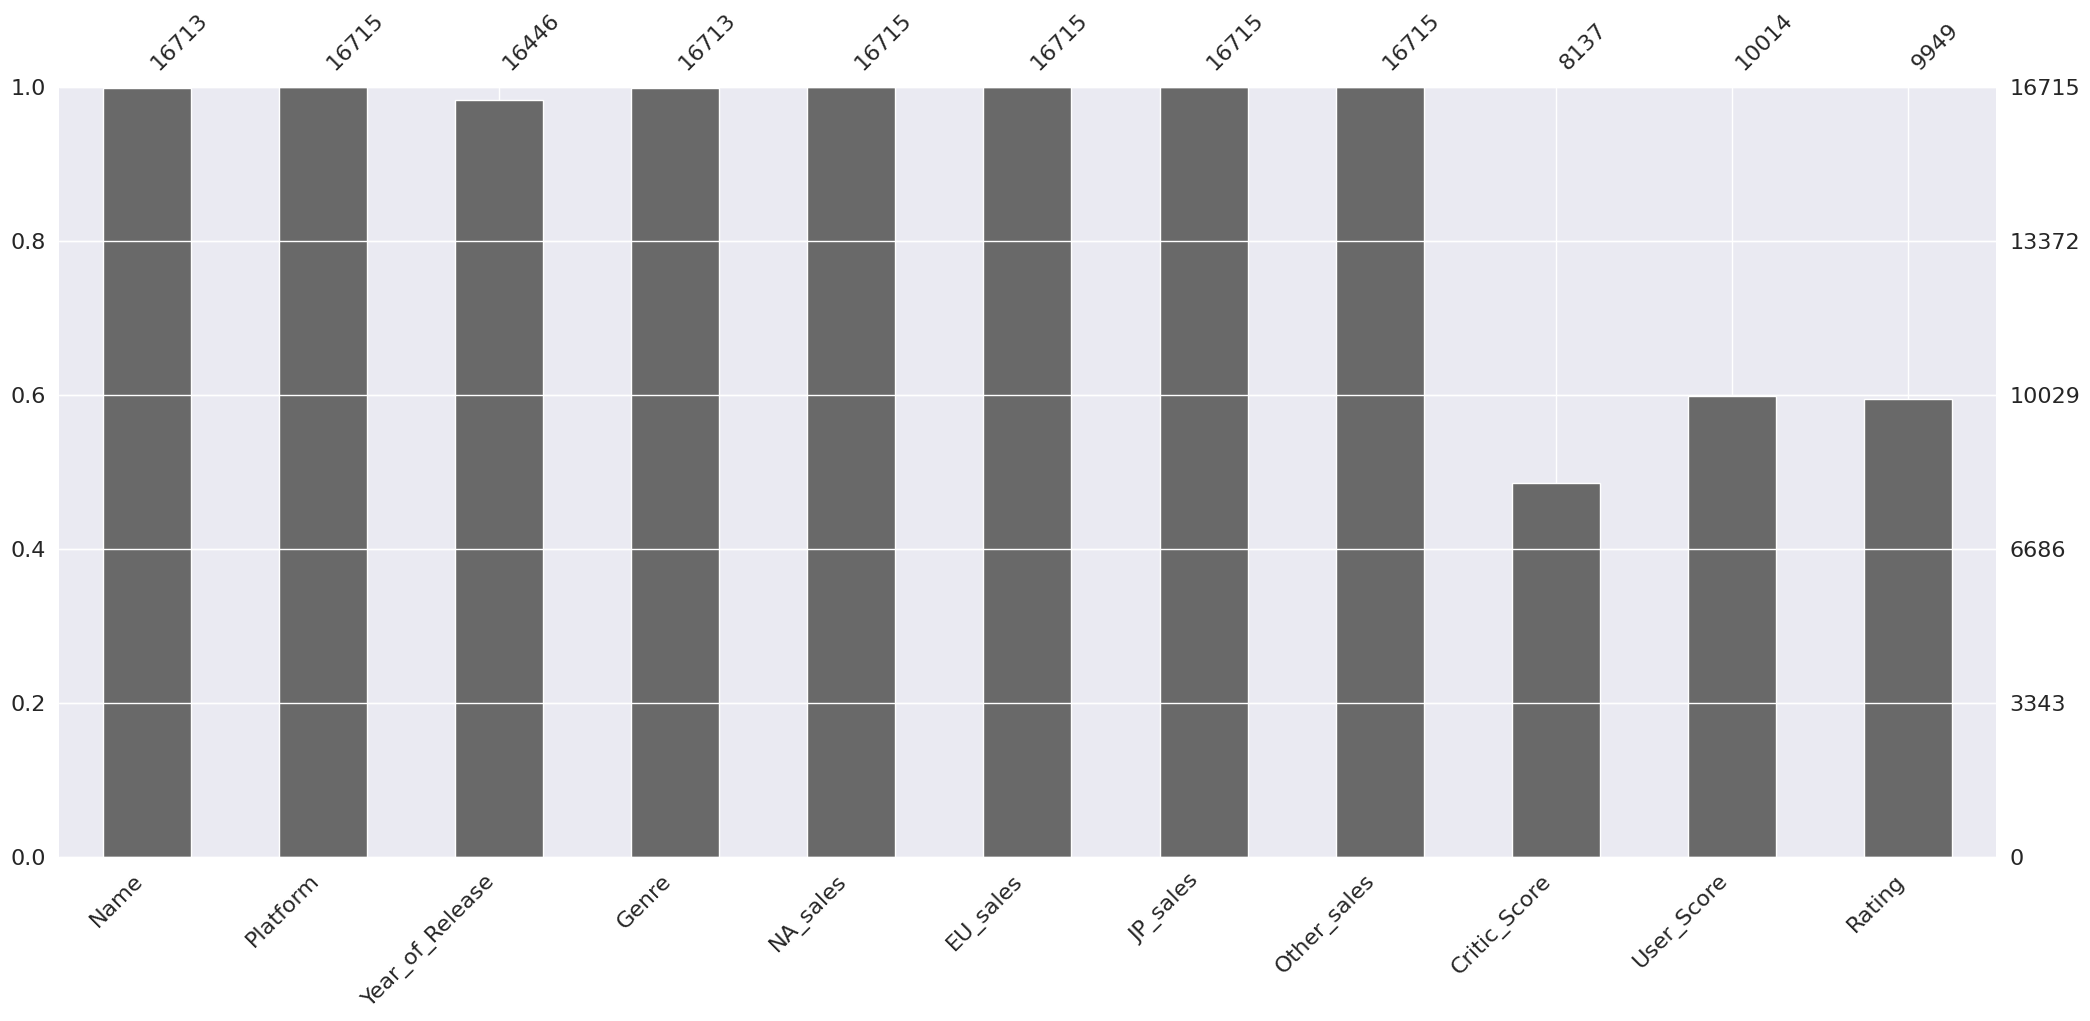

In [ ]:
msno.bar(data_games);

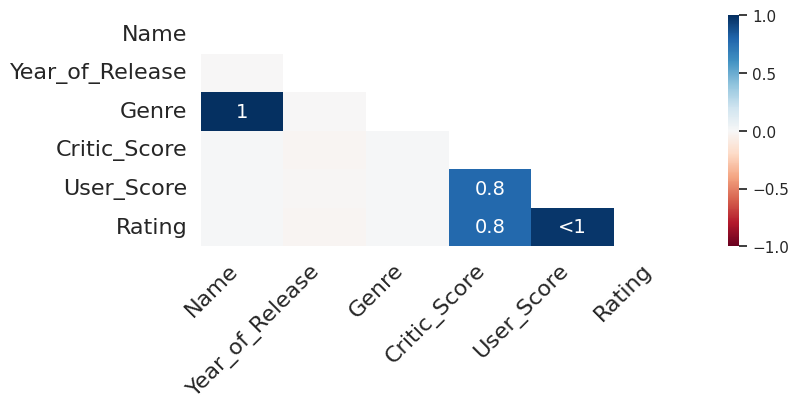

In [ ]:
msno.heatmap(data_games, figsize=(8,3));

**Conclusions:**

- Column names contain uppercase letters;
- The columns `Year_of_Release`, `Critic_Score`, `User_Score` have data types that do not match the values;
- The data contains gaps in 6 out of 11 columns, 3 of which are significant. Gaps in the columns `genre` and `name` have a correlation strength of 1, meaning they are defined in the same rows. Gaps in the columns `Critic_Score` and `User_Score` also have a strong correlation.

<font color='orange'>**The provided data requires additional preprocessing.**</font>

## Data Preprocessing




Before starting preprocessing of the original dataset, let's resave it to the df_x variable.

In [ ]:
df_games=pd.DataFrame(data_games)

### Handling Column Names

Let's convert the column names to lowercase:

In [ ]:
df_games.columns = df_games.columns.str.lower()

Let's check the result:

In [ ]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Data Type Conversion

The columns `year_of_release`, `critic_score`, `user_score` have data types that do not correspond to the values. Let's bring them into correspondence for more convenient data processing. We will also convert the `float64` data type to `float32` to save computing memory.

1. The `year_of_release` and `critic_score` columns have the `float64` data type and are integer data. Let's convert the data to the `int32` type.

In [ ]:
#df_games['year_of_release'] = df_games['year_of_release'].astype(np.int32)
#df_games['critic_score'] = df_games['critic_score'].astype(np.int32)

2. The `user_score` column has the `object` data type and contains the `float` data type. Let's convert the data to the `float32` type.

In [ ]:
#df_games['user_score'] = df_games['user_score'].astype(np.float32)

In the first case, the conversion did not work because the columns have missing NaN values, which are not supported by the `int32` data type. In the second case, the `user_score` column contains the abbreviation `tbd`, which means to be determined = will be determined, and is a string value. Let's replace the abbreviation `tbd` with NaN, to enable data type conversion.

In [ ]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan

Let's check that the value 'tbd' has been replaced:

In [ ]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Let's convert the data type in the `user_score` column:

In [ ]:
df_games['user_score'] = df_games['user_score'].astype(np.float32)

Convert the data in the columns `na_sales`, `eu_sales`, `jp_sales`, `other_sales` and `critic_score` to the type `float32`

In [ ]:
df_games = df_games.astype(
    {
    'na_sales': np.float32,
    'eu_sales': np.float32,
    'jp_sales': np.float32,
    'other_sales': np.float32,
    'critic_score': np.float32,
    }
)

Let's check the data type and the number of missing values ​​(should increase):

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.0+ MB


**Conclusion:**

We will return to processing the data types of the `year_of_release` and `critic_score` columns after processing the missing values.

### Handling Missing Values

1. Let's look at the missing values ​​in the `name` and `genre` columns, there are only 2 in each

In [ ]:
df_games.loc[df_games['name'].isna() & df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The values ​​in the columns are missing in the same 2 rows. There is nothing to replace them with, their number is minimal - we will remove them from the dataset.

In [ ]:
df_games.dropna(subset = ['name'], inplace=True)
df_games['name'].isna().sum()

0

Let's check that there are only 2 deleted lines:

In [ ]:
df_games.shape[0]

16713

2. The `year_of_release` column contains 1.6% missing values. There is no obvious replacement for these missing values. Removing them will not result in a loss of many observations, just remove these rows.

In [ ]:
df_games.dropna(subset = ['year_of_release'], inplace=True)
df_games['year_of_release'].isna().sum()

0

Let's check the amount of data remaining:

In [ ]:
df_games.shape[0]

16444

3. The `critic_score` and `user_score` columns contain about 50% of missing values. Removing them will result in the loss of a large amount of data needed for further research. We will leave the gaps in these columns unchanged.

4. The `rating` column is categorical and contains 40.5% missing values. Removing them will result in losing a large amount of data needed for further research. Let's replace the missing data with the value "Unknown".

In [ ]:
df_games.loc[df_games['rating'].isna(), 'rating'] = 'Unknown'

Let's check the changes made:

In [ ]:
df_games['rating'].isna().sum()

0

In [ ]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,Unknown


**Let's go back to converting the data type in the `year_of_release` column. The `critic_score` column cannot be converted to the `int32` data type because we left missing values ​​in it.**

In [ ]:
df_games['year_of_release'] = df_games['year_of_release'].astype(np.int32)

Let's check the final general information on the dataset:

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


Let's see how much data is lost as a result of missing value processing.

In [ ]:
round(100-((df_games.shape[0] / data_games.shape[0]) * 100), 1)

1.6

**Conclusion: 1.6% of data is lost. We consider this percentage acceptable.**

### Handling Duplicates

####  Handling Explicit Duplicates

In [ ]:
df_games.duplicated().sum()

0

####  Handling Implicit Duplicates

Let's check the `platform` and `genre` columns for implicit duplicates.

In [ ]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Conclusions:**

No explicit or implicit duplicates were found.

### Calculation of total sales in all regions

Let's calculate the total sales in all regions and write them down in a separate column.

In [ ]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,Unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,Unknown,31.380001


**Conclusion:**

The data is ready for further exploratory analysis.

## Exploratory Data Analysis

### How many games were released in different years. Is data for all periods important?

Let's visualize data on the number of games released by year.

In [ ]:
df_games.groupby('year_of_release')['name'].count()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


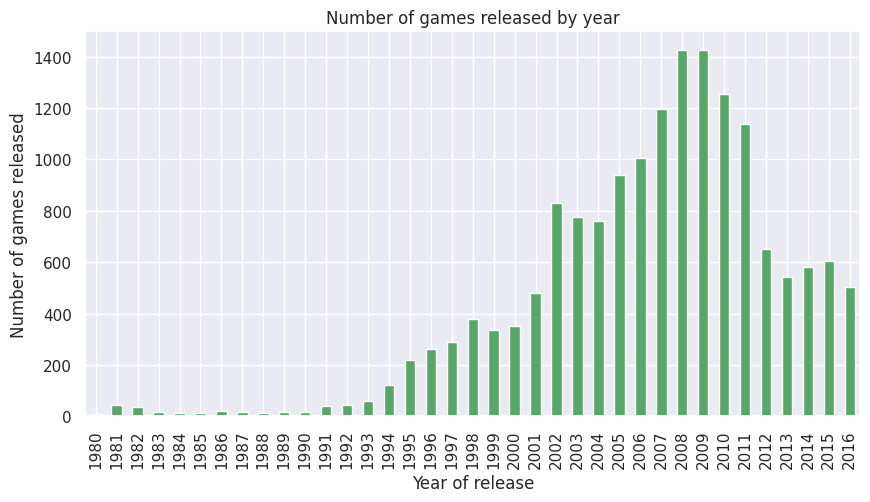

In [ ]:
df_games.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(10, 5), color='g');

plt.title('Number of games released by year')
plt.xlabel('Year of release')
plt.ylabel('Number of games released');

**Conclusion:**

Before 1994, up to 60 games were released per year, given the age of the games released and their quantity, the data for these years can be ignored when conducting the study.

### How sales changed by platform. Selecting platforms with the highest total sales and constructing distribution by year. What is the typical time frame for new platforms to appear and old ones to disappear?

Let's make a pivot table

In [ ]:
platform_sales = df_games.pivot_table(
    index=['platform'],
    values=['total_sales'],
    aggfunc={'sum'},
)
platform_sales.columns = ['overall_sales_per_platform']
platform_sales.sort_values(by='overall_sales_per_platform', ascending=False)

,overall_sales_per_platform
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.780029
PS,727.580017
PS4,314.140015
GBA,312.880005
PSP,289.529999


Let's build a column chart

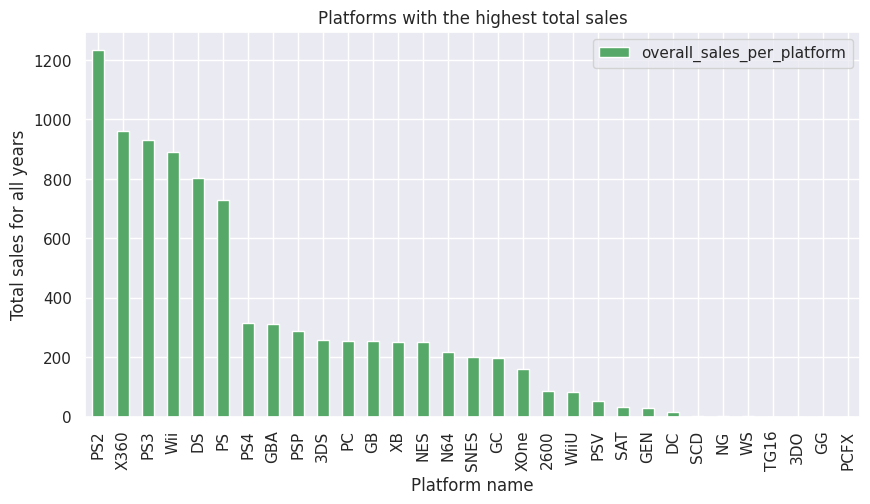

In [ ]:
(
    platform_sales
    .sort_values(by='overall_sales_per_platform', ascending=False)
    .plot(kind='bar', y='overall_sales_per_platform', grid=True, figsize=(10, 5), color='g')
)
plt.title('Platforms with the highest total sales')
plt.xlabel('Platform name')
plt.ylabel('Total sales for all years');

Let's select 6 platforms with the highest sales and look at the distribution by year.

In [ ]:
top_platform = platform_sales.sort_values(by='overall_sales_per_platform', ascending=False).head(6)
top_platform

,overall_sales_per_platform
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.780029
PS,727.580017


In [ ]:
top_platform_list = list(top_platform.index)
top_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [ ]:
df_top_platform = df_games.query('platform.isin(@top_platform_list)')
df_top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000


In [ ]:
top_platform_sales = df_top_platform.pivot_table(
    index=['platform', 'year_of_release'],
    values=['total_sales'],
    aggfunc={'sum'},
)
top_platform_sales.columns = ['sales_per_year']
top_platform_sales

sales_per_year
platform year_of_release                
DS       1985                   0.020000
         2004                  17.270000
         2005                 130.139999
         2006                 119.809998
         2007                 146.940002
...                                  ...
X360     2012                  99.739998
         2013                  88.580002
         2014                  34.740002
         2015                  11.960000
         2016                   1.520000

[67 rows x 1 columns]

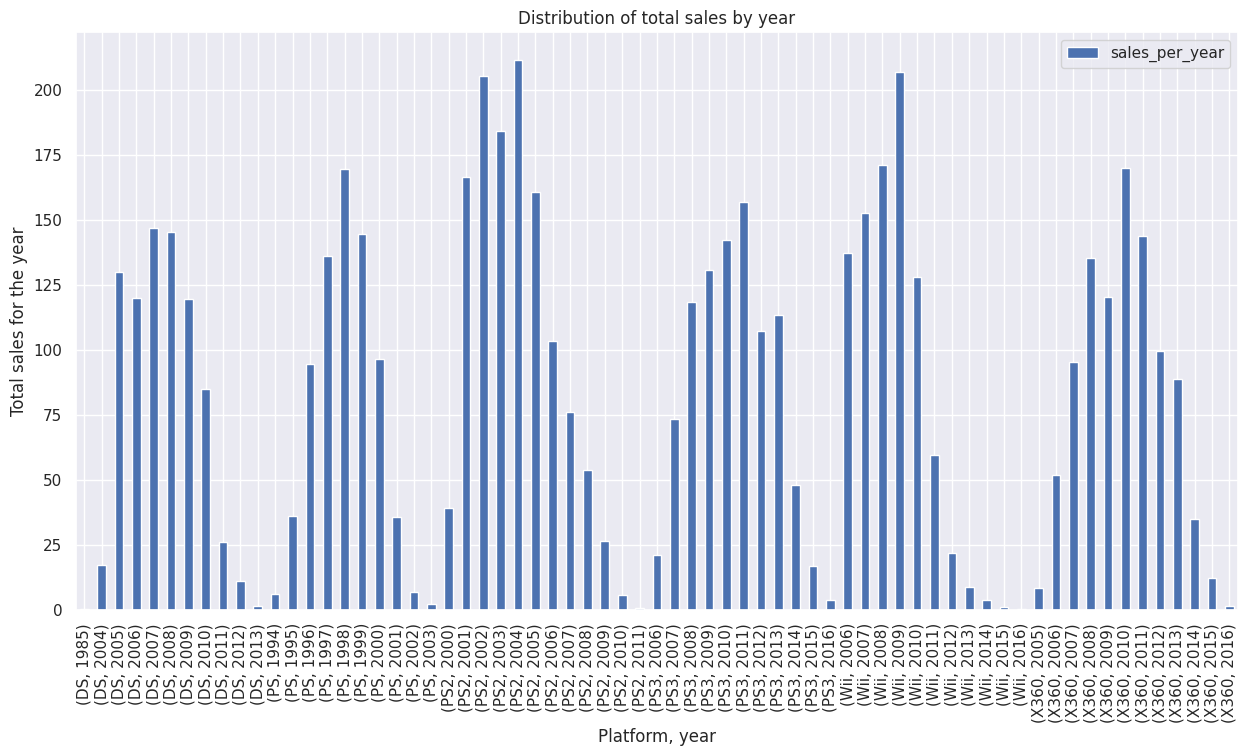

In [ ]:
(
    top_platform_sales
    .plot(kind='bar', y='sales_per_year', grid=True, figsize=(15, 7.5), color='b')
)
plt.title('Distribution of total sales by year')
plt.xlabel('Platform, year')
plt.ylabel('Total sales for the year');

**Conclusion:**

Based on the graphs obtained, it is clear that the platform's life cycle is about 10 years, and the highest sales are in the middle of its existence. In general, the platform needs 4-6 years to reach its peak sales.


### Determination of the current period as a result of researching the previous questions

Based on the data obtained above, we are interested in platforms that were released after 2011. For these platforms, 2017 will be the peak of sales.

In [ ]:
df_platform_bloom = df_games.query('year_of_release >= 2011')
df_platform_bloom.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.730000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.630000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.599999


In [ ]:
df_platform_bloom_agg = df_platform_bloom.pivot_table(
    index='year_of_release',
    columns='platform',
    values=['total_sales'],
    aggfunc={'sum'},
    fill_value=0
)
df_platform_bloom_agg.columns = ['3DS','DS','PC' ,'PS2', 'PS3','PS4','PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_platform_bloom_agg = df_platform_bloom_agg.reset_index()
df_platform_bloom_agg = df_platform_bloom_agg.set_index('year_of_release')
df_platform_bloom_agg

,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.199997,26.18,35.029999,0.45,156.779999,0.000000,17.82,4.630000,59.649998,0.000000,143.839996,0.000000
2012,51.360001,11.01,23.219999,0.00,107.360001,0.000000,7.69,16.190001,21.710001,17.559999,99.739998,0.000000
2013,56.570000,1.54,12.380000,0.00,113.250000,25.990000,3.14,10.590000,8.590000,21.650000,88.580002,18.960001
2014,43.759998,0.00,13.280001,0.00,47.759998,100.000000,0.24,11.900000,3.750000,22.030001,34.740002,54.070000
2015,27.780001,0.00,8.520000,0.00,16.820000,118.900002,0.12,6.250000,1.140000,16.350000,11.960000,60.139999
2016,15.140000,0.00,5.250000,0.00,3.600000,69.250000,0.00,4.250000,0.180000,4.600000,1.520000,26.150000


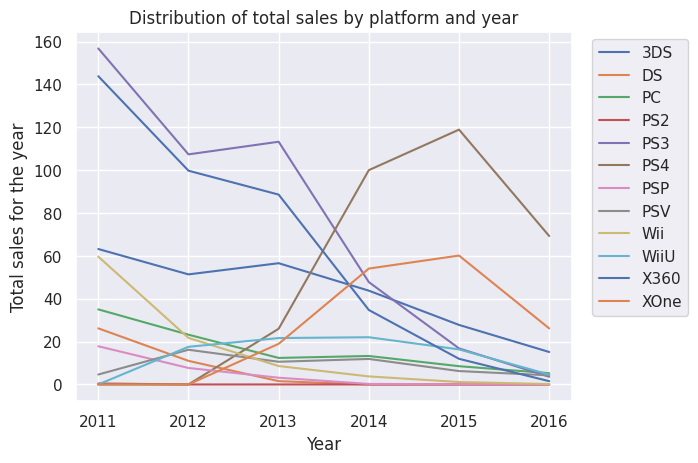

In [ ]:
df_platform_bloom_agg.plot()

plt.legend(bbox_to_anchor=(1.25 , 1 ), loc='upper right');

plt.title('Distribution of total sales by platform and year')
plt.xlabel('Year')
plt.ylabel('Total sales for the year');

### Which platforms are leading in sales, growing or falling? Selecting several potentially profitable platforms

Based on the graph above, we can conclude that the PS2, X360, PS3, Wii, DS and PS platforms, which were the leaders in sales in previous years, are currently showing poor results. The 3DS platform is also on a downward sales trend, although it has higher figures.

While the **PS4** platform (given the incompleteness of data for 2016) is now in the sales growth stage and is potentially profitable. Also, the **XOne** platform, which is also in the growth stage, can be considered as potentially profitable.

### Plotting a box plot of global game sales by platform. Description of the result

Let's build boxes with mustaches based on the 5 most promising platforms for the current period 2014-2016.

In [ ]:
df_platform_bloom_top5 = df_games.query('year_of_release >= 2014 and platform.isin(["PS4", "XOne", "3DS", "X360", "PS3"])')
df_platform_bloom_top5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.980000


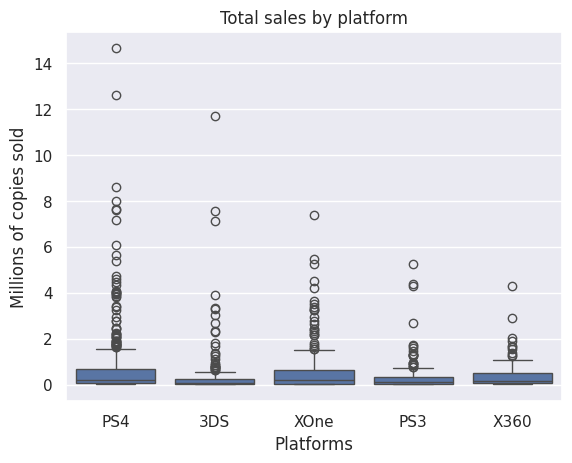

In [ ]:
sns.boxplot(data=df_platform_bloom_top5, x='platform', y='total_sales')

plt.title('Total sales by platform')
plt.suptitle('')
plt.xlabel('Platforms');
plt.ylabel('Millions of copies sold');

**Conclusion**

In the first graph, we see that each of the five platforms selected has super popular games that are significantly out of the "whiskers" range in terms of the total number of copies sold. This is especially noticeable on the `PS4` and `3DS` platforms. We can also notice that on the `PS4` and `XOne` platforms, the interquartile range and whisker range are larger, which means that the number of copies sold among the majority of games that are not statistical outliers is also larger.

### How do user and critic reviews affect sales within one popular platform? Plotting a scatterplot and calculating the correlation between reviews and sales. Formulating conclusions

Let's derive the correlation matrix in tabular form and scatter diagrams for the most popular platform PS3:

In [ ]:
PS3 = df_games.query('platform.isin(["PS3"])')

In [ ]:
PS3_numeric = PS3.select_dtypes(include=['float32', 'int32'])

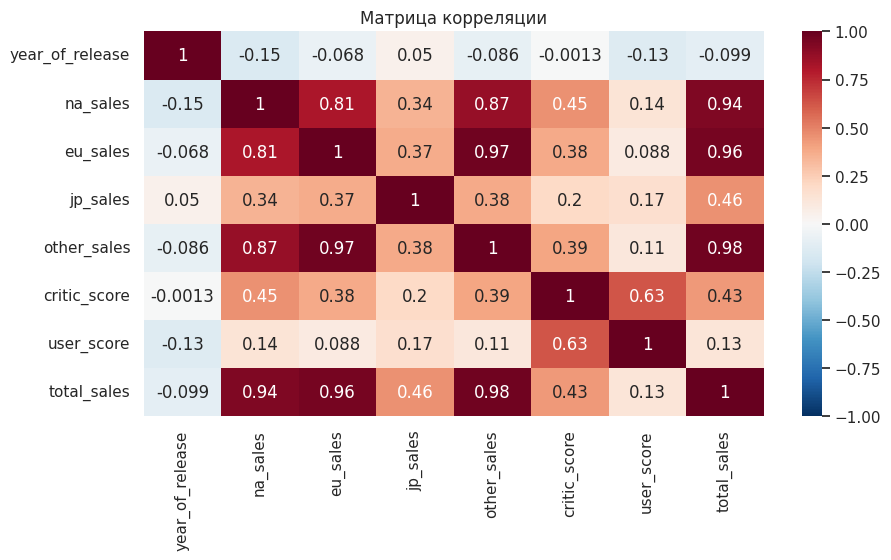

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
sns.heatmap(
    PS3_numeric.corr(),
    annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap= 'RdBu_r');

plt.title('Матрица корреляции');

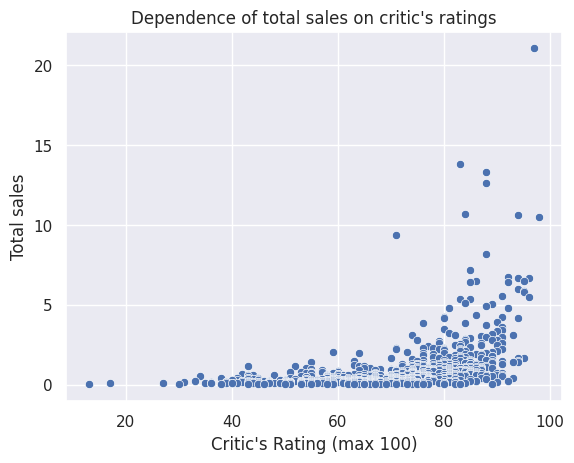

In [ ]:
sns.set(font_scale=1.0)
sns.scatterplot(
    data=PS3,
    x='critic_score',
    y='total_sales',
    )
plt.title('Dependence of total sales on critic\'s ratings');
plt.xlabel(
    'Critic\'s Rating (max 100)')
plt.ylabel(
    'Total sales');

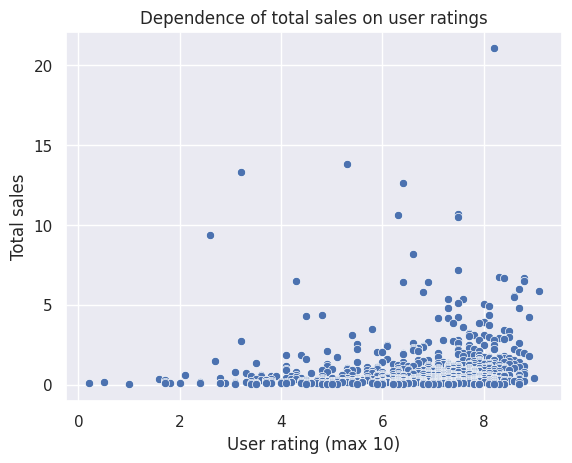

In [ ]:
sns.set(font_scale=1.0)
sns.scatterplot(
    data=PS3,
    x='user_score',
    y='total_sales',
    )
plt.title('Dependence of total sales on user ratings');
plt.xlabel(
    'User rating (max 10)')
plt.ylabel(
    'Total sales');

**Conclusions:**

1. There is an average positive correlation of 0.43 between the total sales and critics' ratings. Moreover, residents of Japan are least affected by critics' ratings on their decision to buy a game.
2. There is virtually no correlation between total sales and user ratings and is 0.13.

### Comparison of findings with sales of games on other platforms.

Let's derive the correlation matrix in tabular form and scatter diagrams for the two potentially profitable platforms we selected:

In [ ]:
df_platform_bloom_top5_numeric = df_platform_bloom_top5.select_dtypes(include=['float32', 'int32'])

In [ ]:
df_platform_bloom_top5_numeric.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.138276,-0.098160,-0.056480,-0.107264,0.084883,0.044198,-0.128494
na_sales,-0.138276,1.000000,0.724003,0.219589,0.839493,0.401679,-0.041642,0.906474
eu_sales,-0.098160,0.724003,1.000000,0.159204,0.932419,0.307921,-0.038693,0.915296
jp_sales,-0.056480,0.219589,0.159204,1.000000,0.139965,0.141620,0.159586,0.384167
other_sales,-0.107264,0.839493,0.932419,0.139965,1.000000,0.349283,-0.028056,0.938907
critic_score,0.084883,0.401679,0.307921,0.141620,0.349283,1.000000,0.553828,0.388020
user_score,0.044198,-0.041642,-0.038693,0.159586,-0.028056,0.553828,1.000000,-0.023211
total_sales,-0.128494,0.906474,0.915296,0.384167,0.938907,0.388020,-0.023211,1.000000


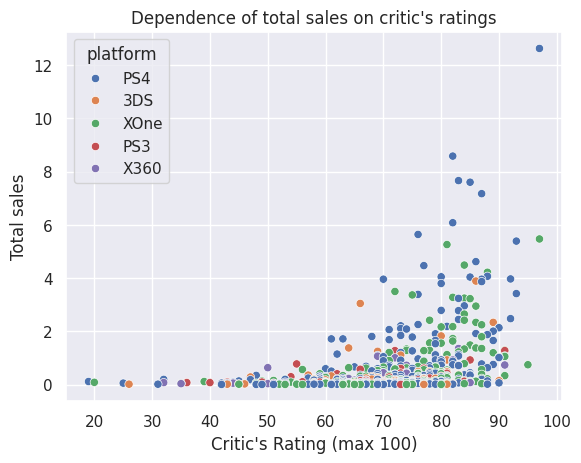

In [ ]:
sns.scatterplot(
    data=df_platform_bloom_top5,
    x='critic_score',
    y='total_sales',
    hue='platform'
)
plt.title('Dependence of total sales on critic\'s ratings');
plt.xlabel(
    'Critic\'s Rating (max 100)')
plt.ylabel(
    'Total sales');

Let's break down the data to make the example more visual.

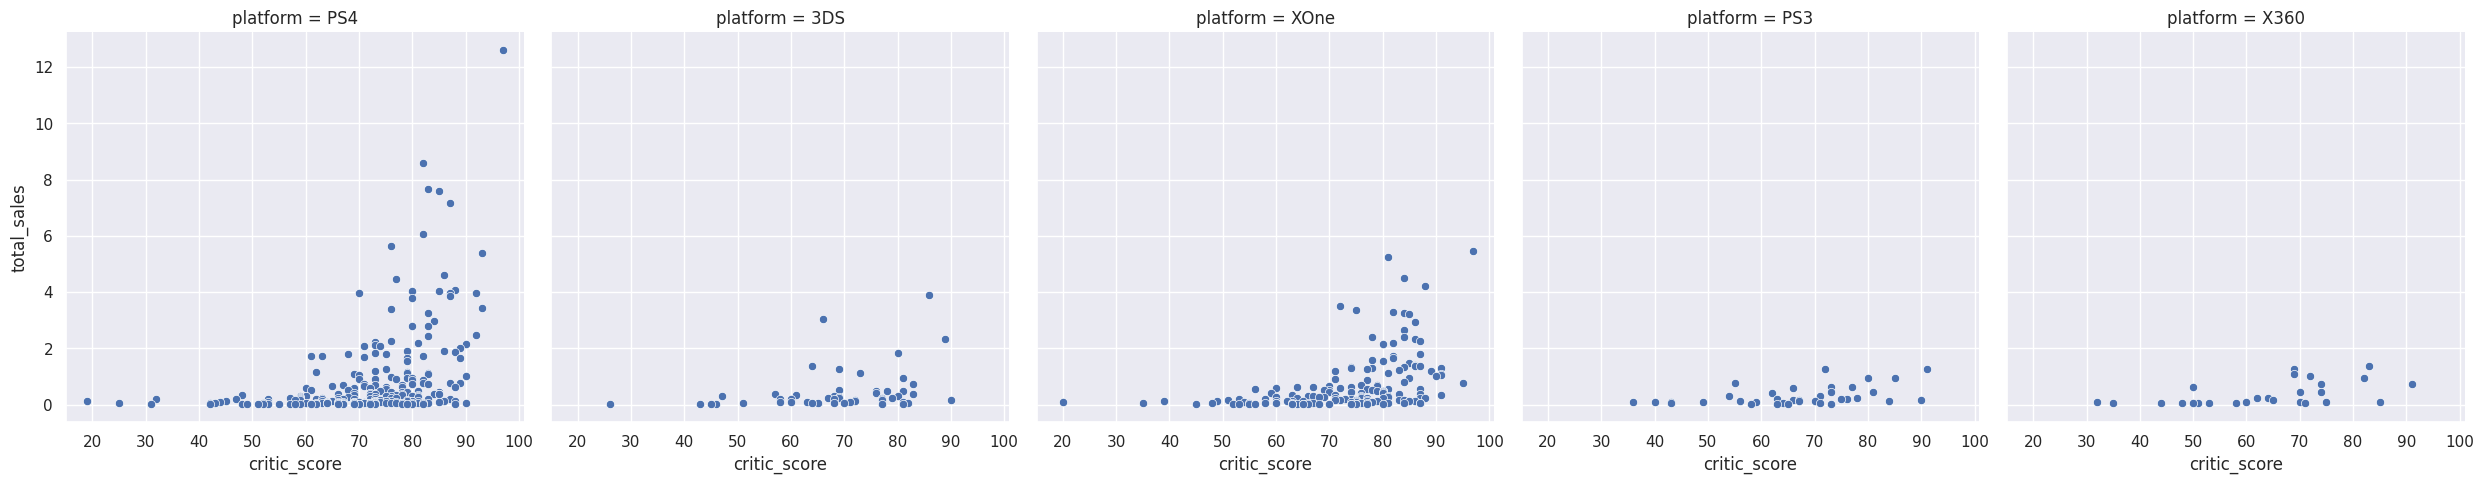

In [ ]:
sns.relplot(
    data=df_platform_bloom_top5,
    x='critic_score',
    y='total_sales',
    kind='scatter',
    col='platform'
);

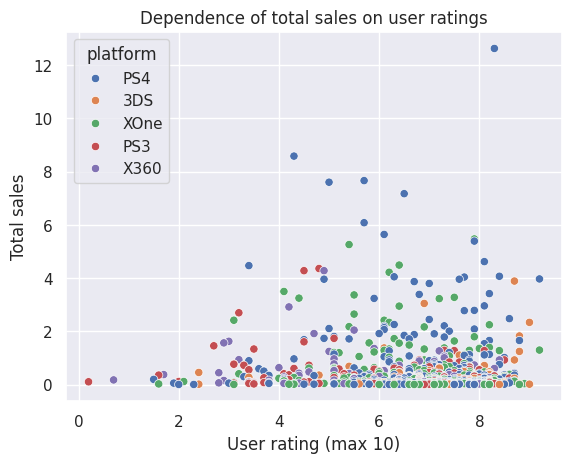

In [ ]:
sns.scatterplot(
    data=df_platform_bloom_top5,
    x='user_score',
    y='total_sales',
    hue='platform'
)
plt.title('Dependence of total sales on user ratings');
plt.xlabel(
    'User rating (max 10)')
plt.ylabel(
    'Total sales');

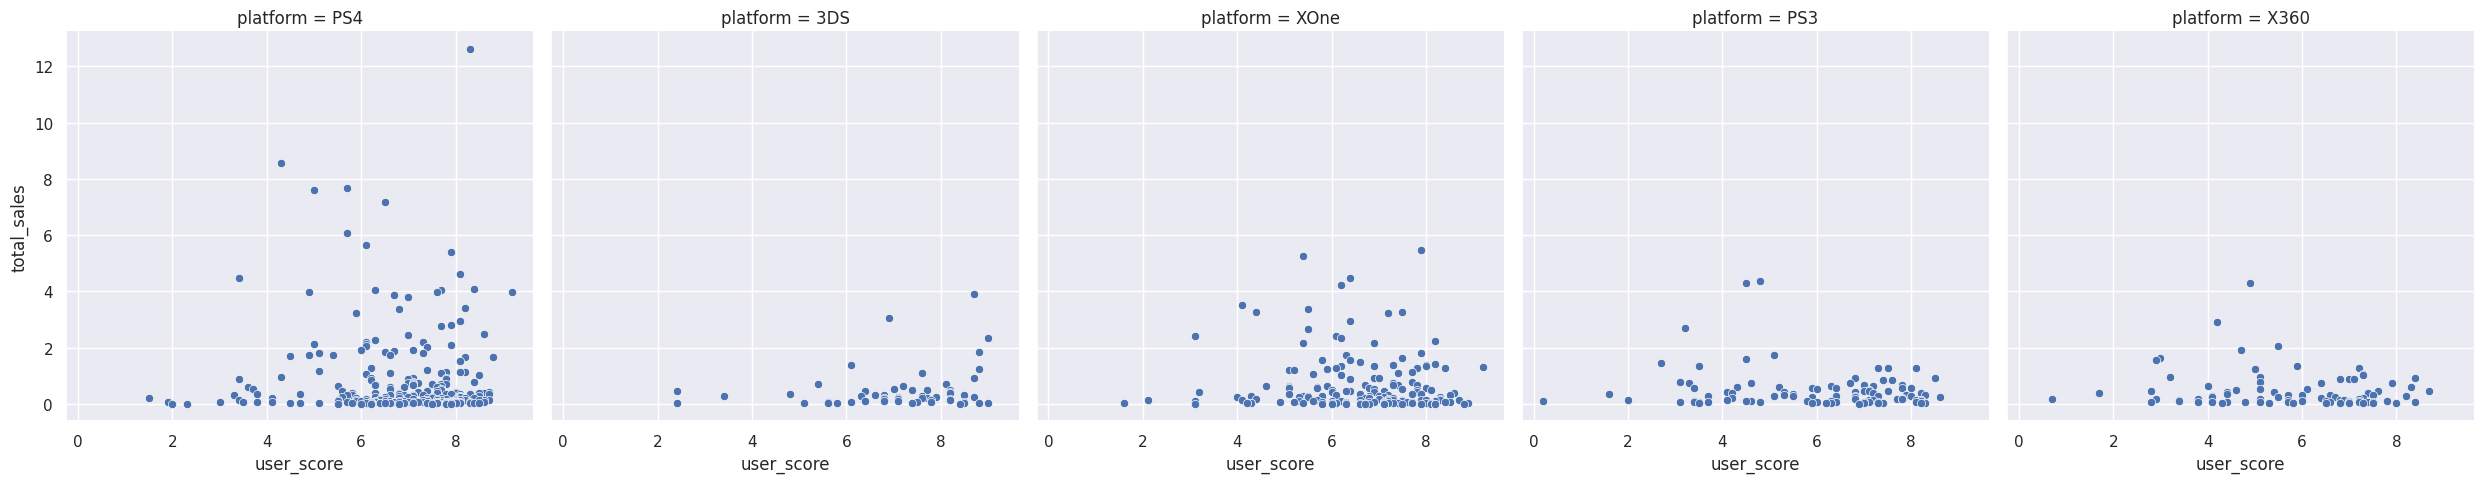

In [ ]:
sns.relplot(
    data=df_platform_bloom_top5,
    x='user_score',
    y='total_sales',
    kind='scatter',
    col='platform'
);

**Conclusions:** Research analysis of other platforms confirms the findings based on the most popular platform.

### Study of the general distribution of games by genre. What can be said about the most profitable genres? Are there genres with high and low sales?

Let's look at the distribution of genres by popularity on the selected 5 platforms over the past 3 years. Given the presence of outliers, let's look at the median sales by genre.

In [ ]:
genre_top5 = df_platform_bloom_top5.pivot_table(
    index=['genre'],
    values=['total_sales'],
    aggfunc={'median'}
)
genre_top5.columns = ['sales_per_genre_median']
genre_top5.reset_index()
genre_top5.sort_values(by='sales_per_genre_median', ascending=False)

,sales_per_genre_median
genre,
Shooter,0.680
Sports,0.280
Role-Playing,0.165
Platform,0.145
Fighting,0.130
Racing,0.125
Simulation,0.120
Action,0.115
Misc,0.110


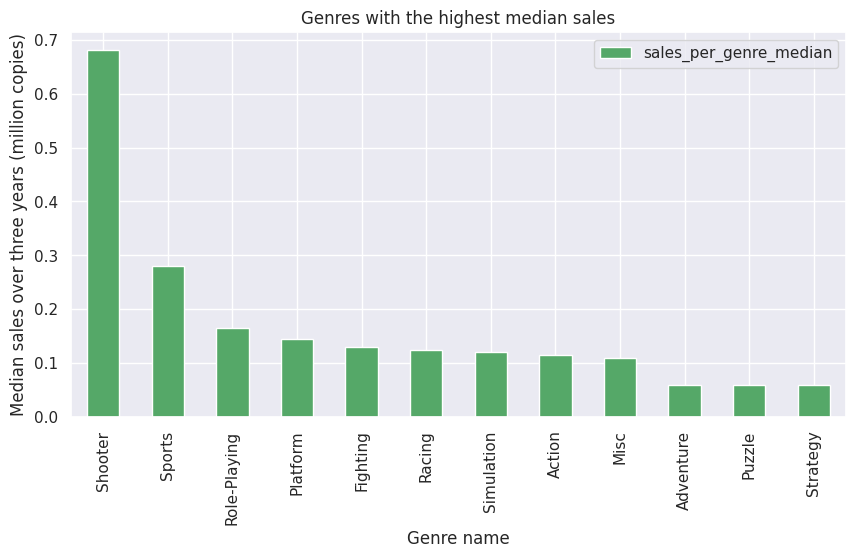

In [ ]:
(
    genre_top5
    .sort_values(by='sales_per_genre_median', ascending=False)
    .plot(kind='bar', y='sales_per_genre_median', grid=True, figsize=(10, 5), color='g')
)
plt.title('Genres with the highest median sales')
plt.xlabel('Genre name')
plt.ylabel('Median sales over three years (million copies)');

Let's look at the distribution of genres by popularity on the selected 5 platforms over the past 3 years, divided by year.

In [ ]:
genre_top5_years = df_platform_bloom_top5.pivot_table(
    index=['genre', 'year_of_release'],
    values=['total_sales'],
    aggfunc={'median'}
)
genre_top5_years.columns = ['sales_per_genre_median']
genre_top5_years = genre_top5_years.reset_index().sort_values(by='sales_per_genre_median', ascending=False)
genre_top5_years

,genre,year_of_release,sales_per_genre_median
24,Shooter,2015,1.205
12,Platform,2014,1.020
23,Shooter,2014,0.815
29,Sports,2014,0.570
27,Simulation,2015,0.340
0,Action,2014,0.260
25,Shooter,2016,0.260
10,Misc,2015,0.250
18,Racing,2015,0.240
17,Racing,2014,0.200


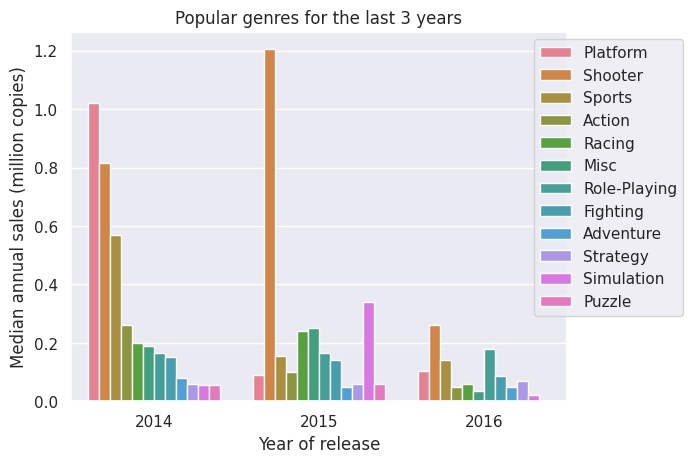

In [ ]:
sns.barplot(
    data=genre_top5_years,
    x='year_of_release',
    y='sales_per_genre_median',
    hue='genre',
);
plt.legend(bbox_to_anchor=(1.25 , 1 ), loc='upper right')
plt.title('Popular genres for the last 3 years')
plt.xlabel('Year of release')
plt.ylabel('Median annual sales (million copies)');

**Conclusions:**

1. The most profitable genres over the past 3 years in descending order are Shooter, Sports and Role-Playing. Moreover, Shooter is the leader by a large margin. The least profitable are Adventure, Puzzle and Stratagy.

2. When looking at the situation by year in more detail, the situation changes a little:
- in 2014, Platform is the leader among genres, Shooter is in second place, and Sports is in third place;
- in 2015, Shooter came out on top by a wide margin, followed by Simulation and Misc in third place.
- in 2016, Shooter remains the sales leader, while Role-Playing is currently in second place, followed by Sports.
- the least popular genres over the last 3 years are `Puzzle`, `Stratagy` and `Adventure`, in 2016 the `Puzzle` genre was not even included in the games released by the 5 leading platforms.

However, we keep in mind that the data for 2016 is incomplete and the situation may still change.

## Creating a portrait of the user of each region. Definition for the user of each region (NA, EU, JP):

### The most popular platforms (top 5). Description of differences in sales shares.

We will create a dataset with the most popular platforms (top 5) over the past 3 years.

In [ ]:
df_last_3_years = df_games.query('year_of_release >= 2014')

### The most popular platforms (top 5). Description of differences in sales shares.

**Let's look at the platform popularity ratio in North America**

In [ ]:
top_5_last_3_years_na = df_last_3_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_na

,na_sales
platform,
PS4,98.610001
XOne,81.269997
X360,28.299999
3DS,22.639999
PS3,22.049999


In [ ]:
top_5_last_3_years_na_list = list(top_5_last_3_years_na.index)
top_5_last_3_years_na_list

['PS4', 'XOne', 'X360', '3DS', 'PS3']

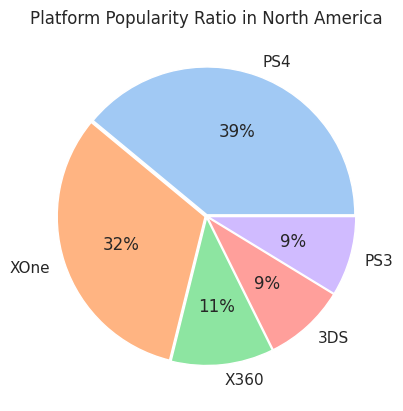

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_na_list
plt.pie(top_5_last_3_years_na, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Platform Popularity Ratio in North America');

**Let's look at the platform popularity ratio in Europe**

In [ ]:
top_5_last_3_years_eu = df_last_3_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_eu

,eu_sales
platform,
PS4,130.039993
XOne,46.250000
PS3,25.539999
PC,17.969999
3DS,16.120001


In [ ]:
top_5_last_3_years_eu_list = list(top_5_last_3_years_eu.index)
top_5_last_3_years_eu_list

['PS4', 'XOne', 'PS3', 'PC', '3DS']

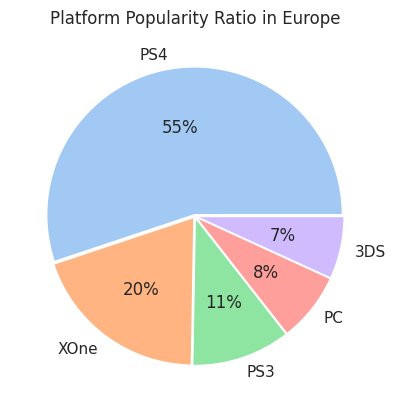

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_eu_list
plt.pie(top_5_last_3_years_eu, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Platform Popularity Ratio in Europe');

**Let's look at the platform popularity ratio in Japan**

In [ ]:
top_5_last_3_years_jp = df_last_3_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_last_3_years_jp

,jp_sales
platform,
3DS,44.240002
PS4,15.020000
PSV,14.540000
PS3,11.220000
WiiU,7.310000


In [ ]:
top_5_last_3_years_jp_list = list(top_5_last_3_years_jp.index)
top_5_last_3_years_jp_list

['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']

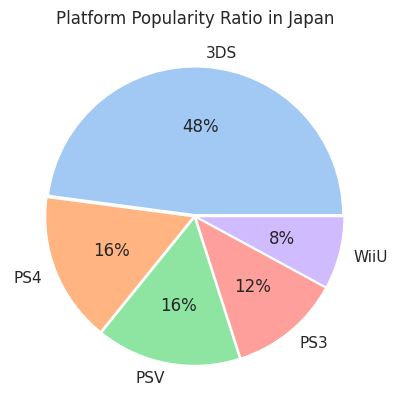

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_last_3_years_jp_list
plt.pie(top_5_last_3_years_jp, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Platform Popularity Ratio in Japan');

**Conclusions:**

1. In North America and Europe, the leading platform is the `PS4` platform with a share of 39% and 55% respectively. Moreover, we see that in Europe, the popularity of the `PS4` platform is much higher.
2. The second place in North America and Europe is occupied by the `XOne` platform with a share of 32% and 20% respectively. It can be noted that in North America, the `PS4` and `XOne` platforms do not differ much in popularity.
3. The third place in North America is occupied by the `X360` platform with a share of 11%, and in Europe and Japan, this platform is completely absent from the top 5.
4. In Japan, significant differences are observed: the first place here is the `3DS` platform with a share of 48%, while in North America and Europe this platform accounts for only 9% and 7% respectively.
5. The most popular platform in North America and Europe, `PS4` is in second place in Japan with a share of 16%.
6. The third place in Japan is occupied by the `PSV` platform with a share of 16%, which is absent from the top 5 in North America and Europe.

So, we see heterogeneity in the popularity of platforms among users of different regions.

### Most popular genres (top 5). Explanation of the difference.

**Let's look at the popularity ratio of genres in North America**

In [ ]:
top_5_genre_last_3_years_na = df_last_3_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_na

,na_sales
genre,
Shooter,79.019997
Action,72.529999
Sports,46.130001
Role-Playing,33.470001
Misc,15.050000


In [ ]:
top_5_genre_last_3_years_na_list = list(top_5_genre_last_3_years_na.index)
top_5_genre_last_3_years_na_list

['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']

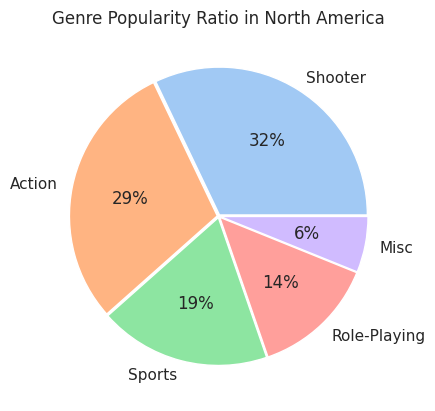

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_na_list
plt.pie(top_5_genre_last_3_years_na, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Genre Popularity Ratio in North America');

**Let's look at the popularity ratio of genres in Europe**

In [ ]:
top_5_genre_last_3_years_eu = df_last_3_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_eu

,eu_sales
genre,
Action,74.680000
Shooter,65.519997
Sports,45.730000
Role-Playing,28.170000
Racing,14.130000


In [ ]:
top_5_genre_last_3_years_eu_list = list(top_5_genre_last_3_years_eu.index)
top_5_genre_last_3_years_eu_list

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

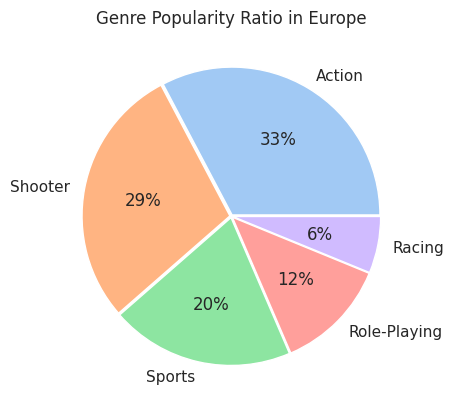

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_eu_list
plt.pie(top_5_genre_last_3_years_eu, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Genre Popularity Ratio in Europe');

**Let's look at the popularity ratio of genres in Japan**

In [ ]:
top_5_genre_last_3_years_jp = df_last_3_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_5_genre_last_3_years_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [ ]:
top_5_genre_last_3_years_jp_list = list(top_5_genre_last_3_years_jp.index)
top_5_genre_last_3_years_jp_list

['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']

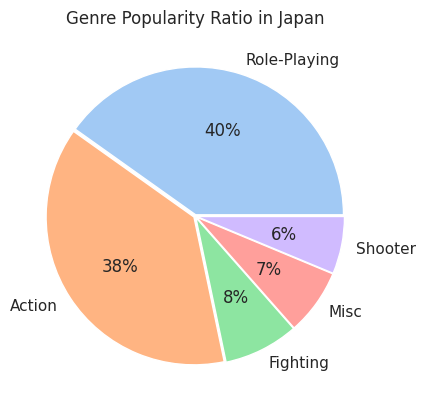

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]
labels = top_5_genre_last_3_years_jp_list
plt.pie(top_5_genre_last_3_years_jp, explode = [0.01, 0.01, 0.01, 0.01, 0.01], colors = colors, autopct='%.0f%%', labels=labels)

plt.title('Genre Popularity Ratio in Japan');

**Conclusions:**

Similar to the popularity of platforms, we observe heterogeneity in the popularity of genres among users in different regions.

1. In North America and Europe, the leading positions are shared by `Shooter` and `Action` with shares of 29% - 33%.

2. Third place in North America and Europe is occupied by the genre `Sports` with 19% and 20% respectively.

3. In Japan, significant differences are observed: the first and second places here are the genres `Role-Playing` and `Action` with shares of 40% and 38% respectively, while in North America and Europe the genre `Role-Playing` is only in 4th place with shares of 14% and 12% respectively.

4. The leading genre in North America and Europe `Shooter` in Japan accounts for only 6% of the top 5 genres.

### Does the ESRB rating affect sales in a particular region?

Let's compile a summary table with sales in regions according to ESRB rating.

In [ ]:
esrb_sales = df_last_3_years.groupby('rating', dropna=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()
esrb_sales = esrb_sales.reset_index()
esrb_sales

,rating,na_sales,eu_sales,jp_sales
0,E,50.740002,58.060001,8.940000
1,E10+,33.230000,26.160000,4.460000
2,M,96.419998,93.440002,8.010000
3,T,38.950001,34.070000,14.780000
4,Unknown,64.720001,58.950001,56.900002


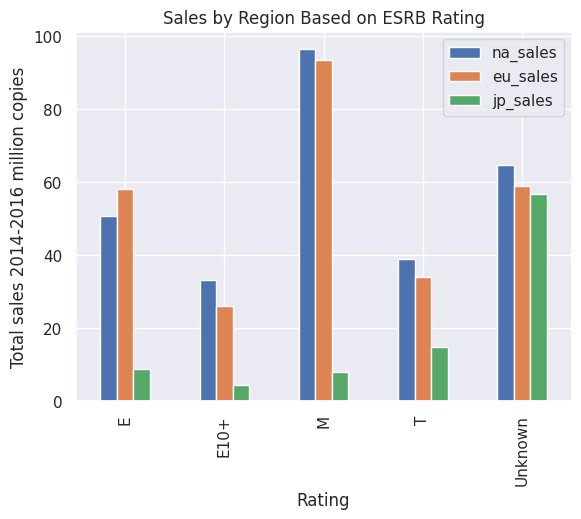

In [ ]:
esrb_sales.plot(x='rating', kind='bar');

plt.title('Sales by Region Based on ESRB Rating')
plt.xlabel('Rating')
plt.ylabel('Total sales 2014-2016 million copies');

**Conclusions:**

1. Sales in the North American and European regions are similar in their parameters regarding the ESRB rating. Japan predictably stands out.

2. North America and Europe sell the most millions of copies of games with the ESRB rating ESRB rating: "M" ("Mature") - "Over 17 years". The lowest sales are with the rating "E10+" ("Everyone 10 and older") - "For everyone over 10 years old".

3. The Japanese market is more focused on consumers with the rating ESRB rating: T ("Teen"). The lowest sales are also with the rating "E10+" ("Everyone 10 and older") - "For everyone over 10 years old".

4. In general, for a large proportion of games the rating is unknown, and, therefore, the distribution of sales by rating may have a completely different form.

## Hypothesis Testing

### Average user ratings for Xbox One and PC platforms are the same

Let's formulate hypotheses:

$H_{0}$: "The average user ratings of the Xbox One and PC platforms are equal";

$H_{1}$: "The average user ratings of the Xbox One and PC platforms are not equal".

Let's test the hypotheses:

In [ ]:
df_xone_user_score = df_last_3_years.query('platform == "XOne" and not(user_score.isnull())')

In [ ]:
df_pc_user_score = df_last_3_years.query('platform == "PC" and not(user_score.isnull())')

In [ ]:
alpha = .05 #the level of statistical significance will be taken as 0.05

results = st.ttest_ind(
    df_xone_user_score['user_score'],
    df_pc_user_score['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis')

p-value: 0.11601545900050317
There is no reason to reject the null hypothesis


**Conclusion:**

The conducted t-test showed a p-value of: 0.11601398086668832, which does not allow us to reject the null hypothesis $H_{0}$ in favor of the alternative $H_{1}$, therefore we can conclude that the average user ratings of the Xbox One and PC platforms are equal.

### Average user ratings for the Action and Sports genres vary

Let's formulate hypotheses:

$H_{0}$: "Average user ratings of the Action and Sports genres are equal";

$H_{1}$: "Average user ratings of the Action and Sports genres are not equal".

Let's test the hypotheses:

In [ ]:
df_action_user_score = df_last_3_years.query('genre == "Action" and not(user_score.isnull())')

In [ ]:
df_sports_user_score = df_last_3_years.query('genre == "Sports" and not(user_score.isnull())')

In [ ]:
alpha = .05 #the level of statistical significance will be taken as 0.05

results = st.ttest_ind(
    df_action_user_score['user_score'],
    df_sports_user_score['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('There is no reason to reject the null hypothesis')

p-value: 1.1825638224397033e-14
Rejecting the null hypothesis


**Conclusion:**

The conducted t-test showed a p-value of: 1.1825550382644557e-14, which allows us to reject the null hypothesis $H_{0}$ in favor of the alternative $H_{1}$, therefore we can conclude that the average user ratings of the Action and Sports genres are unequal.

### Explain how the null and alternative hypotheses are formulated

To test the hypothesis of equality of the means of two populations, a null hypothesis is formulated that the means of the two populations are equal and an alternative hypothesis that the means of the two populations are not equal.

A one-sided alternative hypothesis can also be formulated as a statement that "the mean of the first population is greater than the mean of the second population" or "the mean of the first population is less than the mean of the second population."

### What criterion is used to test the hypotheses and why?

To test the hypotheses, the Student's t-test (ttest_ind) was used to compare the mean values ​​of two independent samples, based on the results of which it is possible to draw conclusions about the equality or difference of the studied means. The Student's t-test is initially assumed for smaller samples, in which the distribution is slightly wider than normal, but it also works for samples of any size.

## General Conclusion

**General information**

---
The conducted data analysis revealed patterns that determine the success of a game, which will allow us to bet on a potentially popular product and plan advertising campaigns. A user profile for each region (NA, EU, JP) was compiled, and hypotheses about average user ratings for two specific platforms and genres were formulated and tested.

**Initial data and preprocessing**

---

The study used a dataset from open sources - historical data on game sales, user and expert ratings, genres and platforms.

There is data up to 2016, the advertising campaign is planned for 2017. Data for 2016 may be incomplete.

- Column names are converted to lower case.
- The original dataset had ***missing values*** in 6 out of 11 columns, 3 of which were significant. Gaps in the `genre` and `name` columns have a correlation strength of 1, meaning they are defined in the same rows. Gaps in the `Critic_Score` and `User_Score` columns also have a strong correlation. Gaps in the `name` and `genre` columns were removed in the amount of 2 rows, in the `year_of_release` column in the amount of 269 rows. Gaps in the `critic_score` and `user_score` columns were left without processing. The total data loss was 1.6%.
- ***Data type*** for the `year_of_release` column was converted to the `int32` data type. Data types of the `float64` columns were converted to `float32` to save computing memory. The `critic_score` column was left in the `float32` data type, as it contains NaN values ​​and cannot be converted to the `int32` data type.

- No ***explicit*** or ***implicit duplicates*** were found.
- The data has been enriched with information on total sales in all regions - a column has been added - `total_sales`.

**Exploratory data analysis**

As a result of the exploratory data analysis, a low number of games released before 1994 were identified. An approximate life cycle of each platform was also determined - about 10 years, with the highest sales in the middle of its existence. In general, a platform needs 4-6 years to reach its peak sales.

**1. Determining Potentially Profitable Platforms**

The relevant period for searching for **potentially promising platforms** is designated from 2011. For these platforms, 2017 will be the peak of sales. The relevant period for the study is 2014-2016.

**Conclusion**

Based on the graphs, we can conclude that the PS2, X360, PS3, Wii, DS and PS platforms, which were the leaders in sales in previous years, are now showing poor results. The 3DS platform, which has not shown outstanding results before, is also in the decline of sales.

While the `PS4` platform (considering the incompleteness of data for 2016) is now in the growth stage of sales and is potentially profitable. The `XOne` platform, which is also in the growth stage, can also be considered as potentially profitable.

In each of the selected 5 platforms `PS4`, `XOne`, `3DS`, `X360`, `PS3` with the largest number of sales in the current period, there are super popular games that stand out from the "whiskers" range by the number of copies sold in total. This is especially noticeable on the `PS4` and `3DS` platforms. We can also notice that on the `PS4` and `XOne` platforms, the interquartile range and the whiskers range are larger, which means that the number of copies sold is also larger among most games that are not statistical outliers.

**2. Determining the relationship between user and critic reviews and the number of sales**

**Conclusions:**

1. On the most popular platform, there is an average positive correlation of 0.43 between the number of total sales and critics' ratings. Moreover, residents of Japan are least affected by critics' ratings on their decision to buy a game.
2. The correlation between total sales and user ratings is practically absent and is 0.13.
3. Analysis of other platforms confirms the conclusions made based on the most popular platform.

**3. Identifying profitable genres**

**Conclusions:**

1. The most profitable genres over the past 3 years in descending order are `Shooter`, `Sports` and `Role-Playing`. Moreover, the `Shooter` genre is in the lead by a large margin. The least profitable are `Adventure`, `Puzzle` and `Stratagy`.

2. When looking at the yearly breakdown in more detail, the situation changes a little:
- in 2014, the leader among genres is the `Platform` genre, the second place is occupied by the `Shooter` genre, and the third place is taken by `Sports`;
- in 2015, the `Shooter` genre came out on top by a wide margin, followed by `Simulation` and in third place by `Misc`.
- in 2016, the `Shooter` genre remains the sales leader, while `Role-Playing` is currently in second place, followed by the `Sports` genre.
- the least popular genres over the past 3 years are `Puzzle`, `Stratagy` and `Adventure`, in 2016, the `Puzzle` genre was not even included in the games released by the top 5 platforms.

However, we keep in mind that the data for 2016 is incomplete and the situation may still change.

**4. User portrait of each region ((NA, EU, JP)**

***4.1 Most popular platforms (top 5)***

**Conclusions:**

1. In North America and Europe, the leading platform is the `PS4` platform with a share of 39% and 55%, respectively. Moreover, we see that in Europe, the popularity of the `PS4` platform is much higher.
2. The second place in North America and Europe is occupied by the `XOne` platform with a share of 32% and 20%, respectively. It can be noted that in North America, the `PS4` and `XOne` platforms do not differ much in popularity.
3. The third place in North America is occupied by the `X360` platform with a share of 11%, and in Europe and Japan, this platform is completely absent from the top 5.
4. In Japan, significant differences are observed: the first place here is the `3DS` platform with a share of 48%, while in North America and Europe this platform accounts for only 9% and 7% respectively.
5. The most popular platform in North America and Europe `PS4` in Japan ranks second with a share of 16%.
6. Third place in Japan is occupied by the `PSV` platform with a share of 16%, which is absent from the top 5 in North America and Europe.

Thus, we observe heterogeneity in the popularity of platforms among users of different regions.

***4.2 Most popular genres (top 5)***

**Conclusions:**

Similar to the popularity of platforms, we observe heterogeneity in the popularity of genres among users of different regions.

1. In North America and Europe, the leading positions are shared by `Shooter` and `Action` with shares of 29% - 33%.

2. Third place in North America and Europe is occupied by the `Sports` genre 19% and 20% respectively.
3. In Japan, there are significant differences: the first and second places are taken by the genres `Role-Playing` and `Action` with shares of 40% and 38% respectively, while in North America and Europe the genre `Role-Playing` is only in 4th place with shares of 14% and 12% respectively.
4. The leading genre in North America and Europe `Shooter` accounts for only 6% of the top 5 genres in Japan.

***4.3 The Impact of the ESRB Rating on Sales in a Separate Region***

**Conclusions:**

1. Sales in the regions of North America and Europe are similar in their parameters in relation to the ESRB rating. Japan predictably stands out.
2. North America and Europe sell the most millions of copies of games with an ESRB rating. ESRB rating: "M" ("Mature") - "Over 17 years". The lowest sales are with the rating "E10+" ("Everyone 10 and older") - "For everyone over 10 years old".
3. The Japanese market is more targeted at consumers with the rating ESRB Rating: T ("Teen"). The lowest sales are also with the rating "E10+" ("Everyone 10 and older") - "For everyone over 10 years old".
4. In general, for a large proportion of games the rating is unknown, and, therefore, the distribution of sales by rating may have a completely different form.


**3. Hypothesis testing**

***3.1 Average user ratings of the Xbox One and PC platforms are the same.***

**Conclusion**

The conducted t-test showed a p-value of: 0.11601398086668832, which does not allow us to reject the null hypothesis $H_{0}$ in favor of the alternative $H_{1}$, therefore we can conclude that the average user ratings of the Xbox One and PC platforms are equal.

***3.2 Average user ratings of the Action and Sports genres are different.***

**Conclusion:**

The conducted t-test showed a p-value of 1.1825550382644557e-14, which allows us to reject the null hypothesis $H_{0}$ in favor of the alternative $H_{1}$, therefore, we can conclude that the average user ratings of the Action and Sports genres are not equal.

**GENERAL CONCLUSION**

---
Answering the question of the purpose of the study, we can conclude:
1. The advertising campaign for 2017 should be divided into 2 main areas:

- North America and Europe;
- Japan.

2. For North American and European consumers, it makes sense to focus on Shooter and Action games released on the PS4 or XOne platform. Moreover, the profitability of the Shooter genre is determined by the immediate popularity of the genre itself, while the Action genre has a larger number of different games released and purchased.

3. For Japanese consumers, it makes sense to focus on Role-Playing and Action games released on the 3DS or PS4 platform. Considering that the 3DS platform is still on a declining sales trend, special attention should be paid to the PS4 platform.

4. If it is possible to conduct a single unified advertising campaign, preference should be given to Action games on the PS4 platform.